In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/Student_Performance - Student_Performance (1).csv")
display(df.head())
display(df.tail())

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95
9999,7,74,No,8,1,64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop("Performance Index", axis=1)   # replace "target_column" with your actual target
y = df["Performance Index"]

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the linear regression model
model = LinearRegression()

In [ ]:
print(X_train)

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
5              1               49                           1            4   
0              7               99                           1            9   
7              6               83                           1            8   
2              8               51                           1            7   
9              7               74                           0            8   
4              7               75                           0            8   
3              5               52                           1            5   
6              7               64                           1            8   

   Sample Question Papers Practiced  
5                                 2  
0                                 1  
7                                 5  
2                                 2  
9                                 1  
4                                 5  
3                              

In [ ]:
print(y_train)

9254    36
1561    25
1670    59
6087    22
6669    40
        ..
5734    48
5191    51
5390    44
860     20
7270    24
Name: Performance Index, Length: 8000, dtype: int64


In [ ]:
print(X_train.select_dtypes(include=['object']))


     Extracurricular Activities
9254                         No
1561                        Yes
1670                         No
6087                         No
6669                         No
...                         ...
5734                        Yes
5191                         No
5390                         No
860                          No
7270                         No

[8000 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['Extracurricular Activities'] = le.fit_transform(X_train['Extracurricular Activities'])
X_test['Extracurricular Activities'] = le.transform(X_test['Extracurricular Activities'])


In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Predict
y_pred = model.predict(X_test)
print(y_pred)

[54.71185392 22.61551294 47.90314471 ... 16.79341955 63.34327368
 45.94262301]


In [ ]:
print(y_test)

6252    51
4684    20
1731    46
4742    28
4521    41
        ..
6412    45
8285    66
7853    16
1095    65
6929    47
Name: Performance Index, Length: 2000, dtype: int64


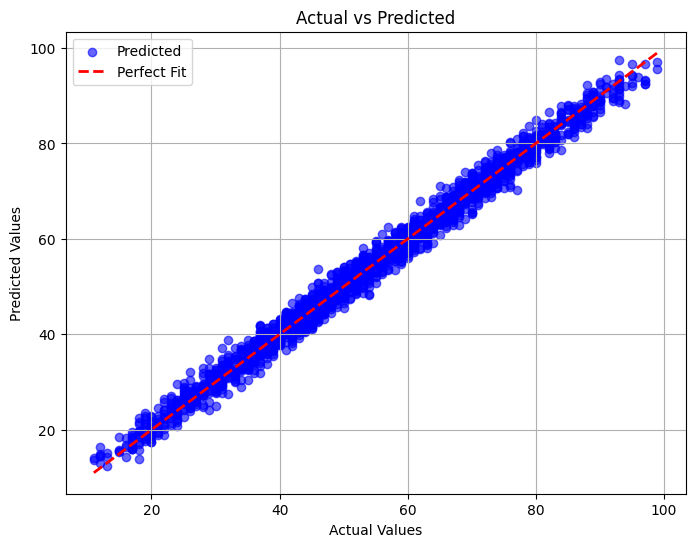

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [ ]:
# Print metrics
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² Score: 0.9890
Mean Squared Error (MSE): 4.0826
Root Mean Squared Error (RMSE): 2.0206
